In [1]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [3]:
#  Load Dataset
df = pd.read_csv("Lung Cancer Dataset.csv")

In [4]:
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


In [5]:
df.tail()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO
4999,33,0,1,0,0,1,1,58.245188,0,1,1,1,94.206934,1,0,0,0,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [7]:
print(df.duplicated().sum())

0


In [8]:
df.describe()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
count,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,57.222800,0.501200,0.666400,0.6012,0.539800,0.516000,0.439200,55.032043,0.394800,0.80040,0.354200,0.698200,94.991029,0.600600,0.301800,0.204000,0.209600
std,15.799224,0.500049,0.471546,0.4897,0.498463,0.499794,0.496339,7.913083,0.488857,0.39974,0.478318,0.459085,1.481048,0.489824,0.459085,0.403009,0.407064
min,30.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,23.258308,0.000000,0.00000,0.000000,0.000000,89.923133,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,49.440685,0.000000,1.00000,0.000000,0.000000,93.973176,0.000000,0.000000,0.000000,0.000000
50%,57.000000,1.000000,1.000000,1.0000,1.000000,1.000000,0.000000,55.050421,0.000000,1.00000,0.000000,1.000000,94.974073,1.000000,0.000000,0.000000,0.000000
75%,71.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,60.323320,1.000000,1.00000,1.000000,1.000000,95.989272,1.000000,1.000000,0.000000,0.000000
max,84.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,83.046971,1.000000,1.00000,1.000000,1.000000,99.795786,1.000000,1.000000,1.000000,1.000000


In [9]:
print(df['PULMONARY_DISEASE'].unique())

['NO' 'YES']


In [10]:
df.columns

Index(['AGE', 'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
       'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS', 'ENERGY_LEVEL',
       'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
       'THROAT_DISCOMFORT', 'OXYGEN_SATURATION', 'CHEST_TIGHTNESS',
       'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE',
       'PULMONARY_DISEASE'],
      dtype='object')

# Dataset Columns — Description and Modeling Notes

| **Column** | **Meaning** | **Notes for Modeling / Prediction** |
|-------------|-------------|-------------------------------------|
| **AGE** | Age of the individual (years). | Numeric; continuous feature, often correlated with health risk. |
| **GENDER** | Gender (0 = Female, 1 = Male). | Binary categorical feature; may affect risk. |
| **SMOKING** | Whether the person smokes (0 = No, 1 = Yes). | Strong predictor of pulmonary diseases. |
| **FINGER_DISCOLORATION** | Presence of finger discoloration (0 = No, 1 = Yes). | Indicator of poor oxygen circulation; categorical. |
| **MENTAL_STRESS** | Presence of mental stress (0 = No, 1 = Yes). | May affect immunity and health. |
| **EXPOSURE_TO_POLLUTION** | Exposure to air pollution (0 = No, 1 = Yes). | Environmental factor; useful for respiratory risk. |
| **LONG_TERM_ILLNESS** | Existence of a chronic illness (0 = No, 1 = Yes). | Strong predictor; indicates underlying health condition. |
| **ENERGY_LEVEL** | Reported energy level (numeric). | Continuous variable; lower values may indicate fatigue or illness. |
| **IMMUNE_WEAKNESS** | Immune system weakness (0 = No, 1 = Yes). | Binary indicator; affects overall health risk. |
| **BREATHING_ISSUE** | Presence of breathing issues (0 = No, 1 = Yes). | Key symptom for pulmonary problems. |
| **ALCOHOL_CONSUMPTION** | Alcohol consumption (0 = No, 1 = Yes). | Lifestyle factor; may interact with immunity. |
| **THROAT_DISCOMFORT** | Throat discomfort (0 = No, 1 = Yes). | Symptom indicator; may relate to respiratory conditions. |
| **OXYGEN_SATURATION** | Oxygen saturation in blood (percentage). | Continuous; values below 95% may indicate respiratory distress. |
| **CHEST_TIGHTNESS** | Chest tightness or discomfort (0 = No, 1 = Yes). | Symptom indicator; often linked to pulmonary or cardiac conditions. |
| **FAMILY_HISTORY** | Family history of disease (0 = No, 1 = Yes). | Genetic predisposition indicator. |
| **SMOKING_FAMILY_HISTORY** | Presence of smokers in the family (0 = No, 1 = Yes). | Indicates possible secondhand smoke exposure. |
| **STRESS_IMMUNE** | Combined effect of stress and immune weakness (0 = No, 1 = Yes). | Interaction term; captures compound risk. |
| **PULMONARY_DISEASE** | Target variable — whether the person has pulmonary disease (YES/NO). | Target for prediction/classification model. |


In [11]:
print("Shape:", df.shape)

Shape: (5000, 18)


In [12]:
#  Encode Target (YES -> 1, NO -> 0)
#df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES':1, 'NO':0})


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

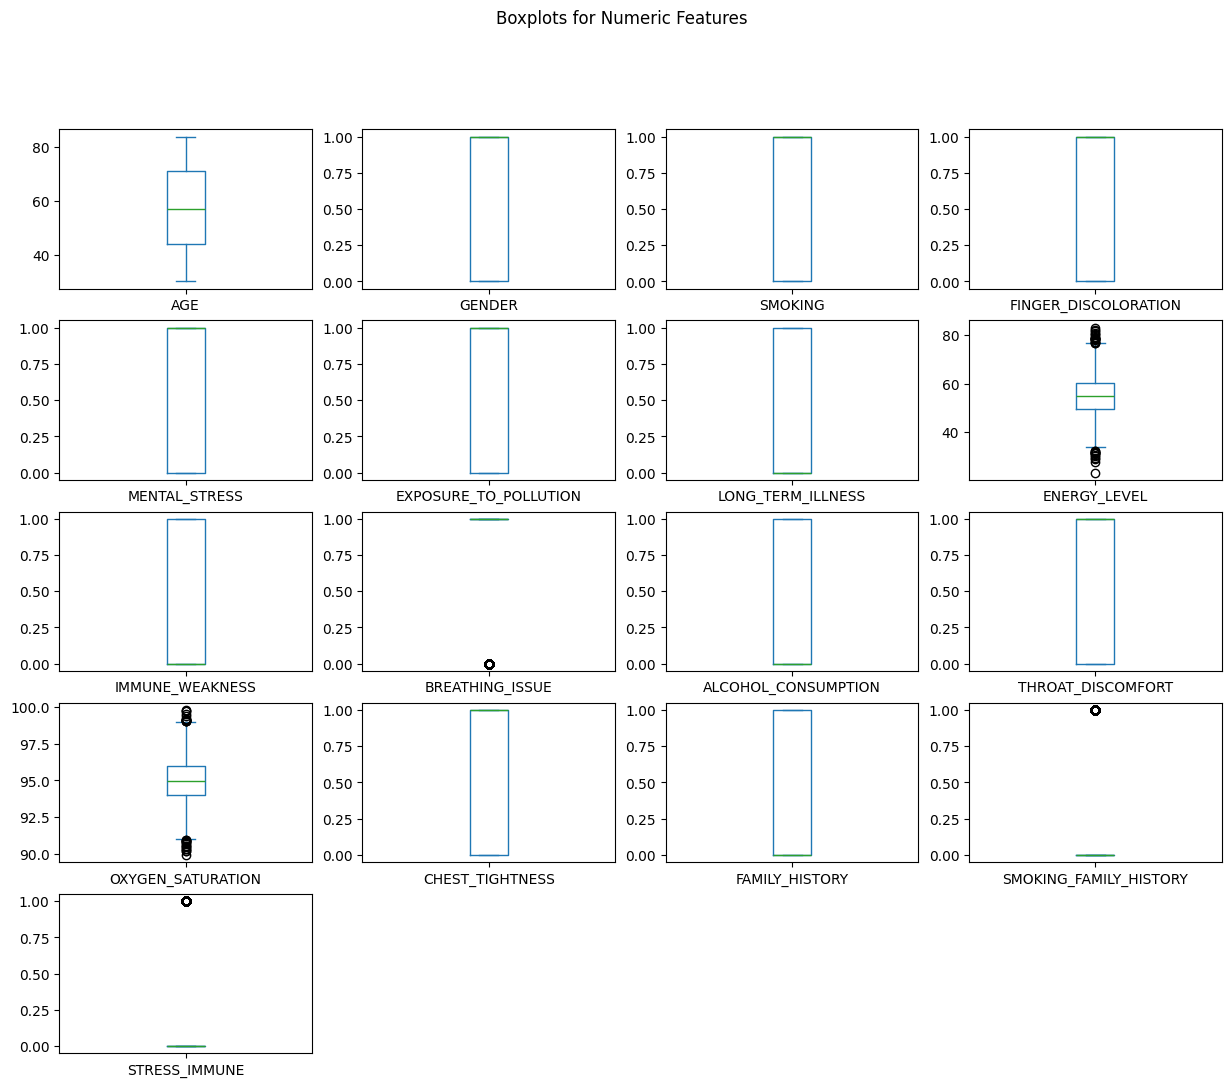

In [14]:
#  Check Outliers (Boxplots for numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].plot(kind='box', subplots=True, layout=(5,4), figsize=(15,12), sharex=False, sharey=False)
plt.suptitle("Boxplots for Numeric Features")
plt.show()

In [15]:
import pandas as pd

# Identify numeric columns
num_cols = df.select_dtypes(include='number').columns

outlier_info = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_info[col] = {
        "lower_bound": lower,
        "upper_bound": upper,
        "outlier_count": len(outliers),
        "outlier_indices": outliers.index.tolist()
    }

# Show summary
outlier_summary = pd.DataFrame({
    col: [outlier_info[col]["outlier_count"]] for col in outlier_info
}).T.rename(columns={0: "Outlier Count"})

outlier_summary



,Outlier Count
AGE,0
GENDER,0
SMOKING,0
FINGER_DISCOLORATION,0
MENTAL_STRESS,0
EXPOSURE_TO_POLLUTION,0
LONG_TERM_ILLNESS,0
ENERGY_LEVEL,31
IMMUNE_WEAKNESS,0
BREATHING_ISSUE,998


In [16]:
df['ENERGY_LEVEL'].describe()


,ENERGY_LEVEL
count,5000.000000
mean,55.032043
std,7.913083
min,23.258308
25%,49.440685
50%,55.050421
75%,60.323320
max,83.046971


In [17]:
df['OXYGEN_SATURATION'].describe()

,OXYGEN_SATURATION
count,5000.000000
mean,94.991029
std,1.481048
min,89.923133
25%,93.973176
50%,94.974073
75%,95.989272
max,99.795786


In [18]:
df['BREATHING_ISSUE'].describe()

,BREATHING_ISSUE
count,5000.00000
mean,0.80040
std,0.39974
min,0.00000
25%,1.00000
50%,1.00000
75%,1.00000
max,1.00000


In [19]:
df['STRESS_IMMUNE'].describe()

,STRESS_IMMUNE
count,5000.000000
mean,0.209600
std,0.407064
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
import plotly.express as px

for col in ['ENERGY_LEVEL', 'OXYGEN_SATURATION', 'BREATHING_ISSUE',
             'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE']:
    fig = px.histogram(df, x=col, nbins=30, marginal='box',
                       title=f'Distribution of {col} (with possible outliers)')
    fig.show()


## Outlier Decision Justification

After performing outlier detection across all numerical columns, potential outliers were identified.  
However, these values were not removed after further analysis of the data and domain context.

### Reasoning

1. **Domain Relevance**
   Many of the detected outliers fall within realistic or medically plausible ranges.  
   For example, variables such as `ENERGY_LEVEL` and `OXYGEN_SATURATION` contain values that may appear unusual statistically but are still valid from a real-world perspective.

2. **Binary and Categorical Features**
   Columns such as `BREATHING_ISSUE`, `LONG_TERM_ILLNESS`, and `SMOKING` contain binary values (0 or 1).  
   Standard statistical methods like the Interquartile Range (IQR) are not meaningful for these columns, since binary variables have a fixed and limited range.

3. **Data Integrity**
   Removing these observations could distort the real distribution of the dataset.  
   In many health-related datasets, extreme values often represent important and valid cases rather than errors.

4. **Model Robustness**
   Most modern machine learning models are robust to moderate outliers.  
   Removing these values could lead to a loss of meaningful variation rather than an improvement in data quality.

### Conclusion

No records were deleted based solely on outlier detection.  
Outlier analysis was used only for diagnostic purposes, and the dataset was retained in full to preserve its original structure and integrity.


In [21]:
#to show balance data or not
fig = px.histogram(df, x='PULMONARY_DISEASE', color='PULMONARY_DISEASE',
                   title='Target Variable Distribution (Disease vs No Disease)')
fig.show()


In [22]:

Binary_cols = [
    'GENDER', 'SMOKING', 'FINGER_DISCOLORATION', 'MENTAL_STRESS',
    'EXPOSURE_TO_POLLUTION', 'LONG_TERM_ILLNESS',
    'IMMUNE_WEAKNESS', 'BREATHING_ISSUE', 'ALCOHOL_CONSUMPTION',
    'THROAT_DISCOMFORT','CHEST_TIGHTNESS',
    'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'STRESS_IMMUNE'
]

PINK_COLOR = '#FF69B4'
GRAY_COLOR = '#A9A9A9'

for col in Binary_cols:

    df['PULMONARY_DISEASE_STR'] = df['PULMONARY_DISEASE'].astype(str)

    mean_vals = df.groupby('PULMONARY_DISEASE_STR', as_index=False)[col].mean()

    color_map = {'1': PINK_COLOR, '0': GRAY_COLOR}
    mean_vals['Color'] = mean_vals['PULMONARY_DISEASE_STR'].map(color_map)

    if '1' not in mean_vals['PULMONARY_DISEASE_STR'].unique():
        print(f"Warning: Only '0' found for PULMONARY_DISEASE in the aggregated data for column {col}")

    fig = px.bar(
        mean_vals,
        x='PULMONARY_DISEASE_STR',
        y=col,
        title=f'Average {col} by Disease Status'
    )

    fig.update_traces(
        marker_color=mean_vals['Color'],
        marker_line_color='black',
        marker_line_width=1.5
    )

    fig.update_layout(
        template='plotly_white',
        title_font=dict(size=18, family='Arial', color='black'),
        xaxis_title='Disease Status (0=NO, 1=YES)',
        yaxis_title=f'Mean of {col}',
        showlegend=False,

        xaxis={'categoryorder': 'array', 'categoryarray': ['0', '1']},
        height=400
    )

    fig.show()

if 'PULMONARY_DISEASE_STR' in df.columns:
    del df['PULMONARY_DISEASE_STR']

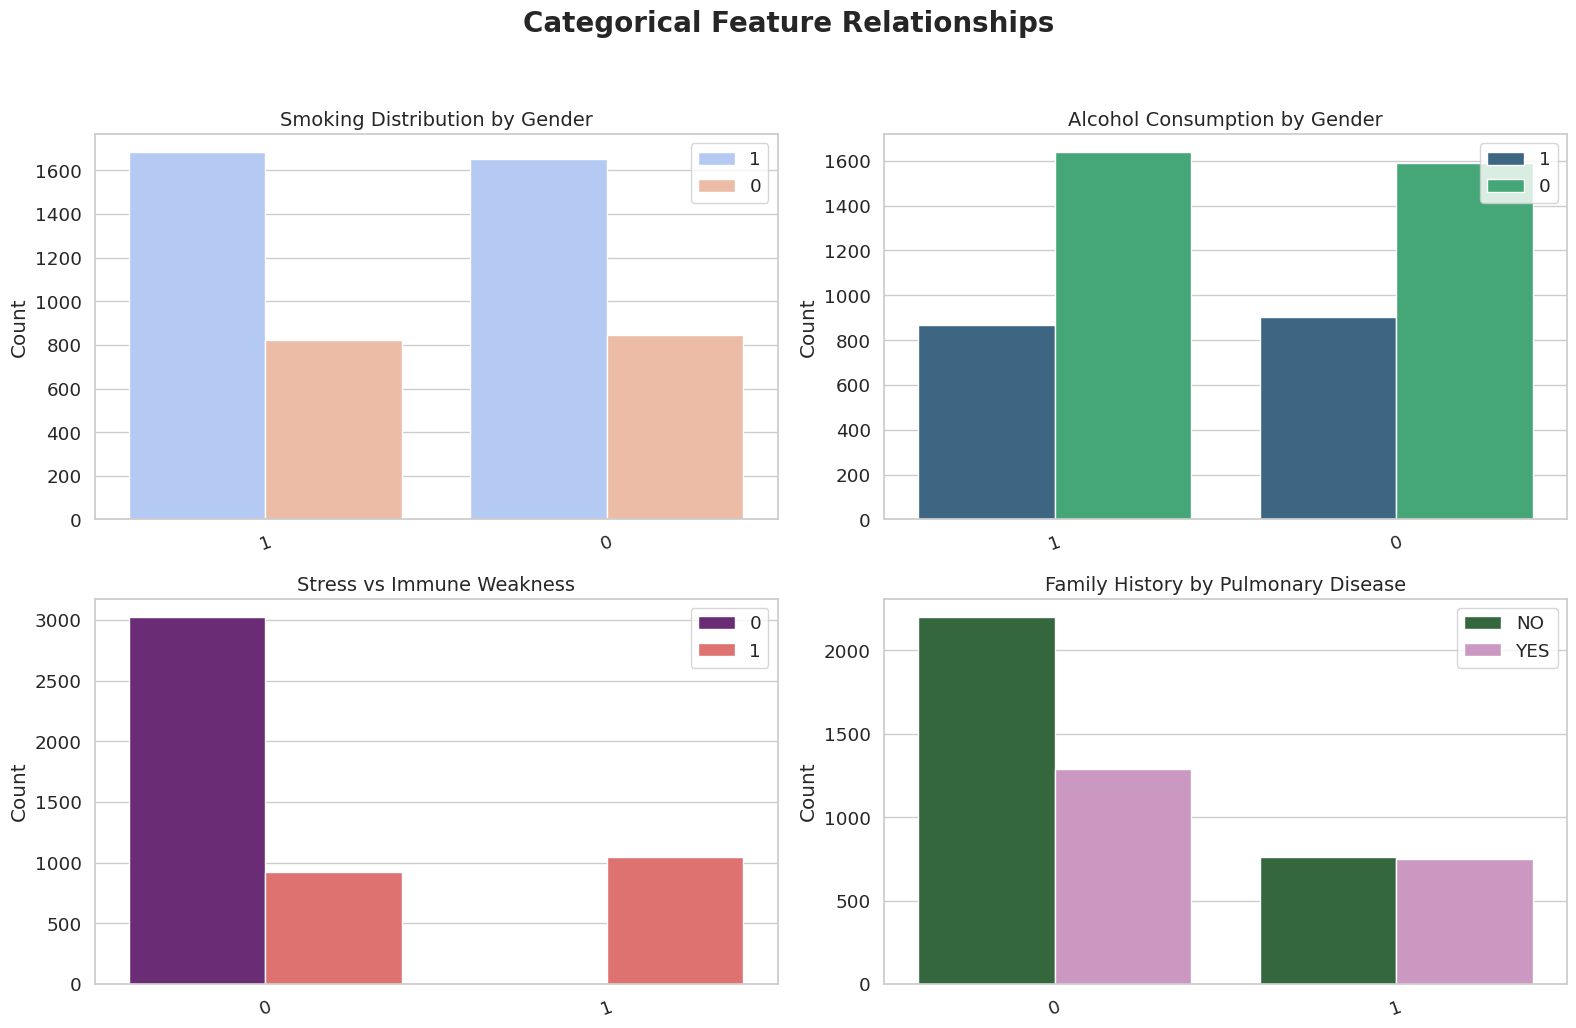

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df_categorical = df.copy()
for col in ['GENDER', 'SMOKING', 'ALCOHOL_CONSUMPTION', 'STRESS_IMMUNE',
            'IMMUNE_WEAKNESS', 'FAMILY_HISTORY', 'SMOKING_FAMILY_HISTORY', 'PULMONARY_DISEASE']:
    df_categorical[col] = df_categorical[col].astype(str)

sns.set(style="whitegrid", font_scale=1.2)


fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Categorical Feature Relationships", fontsize=20, fontweight='bold', y=1.03)

sns.countplot(x="GENDER", hue="SMOKING", data=df_categorical, ax=axes[0, 0], palette="coolwarm")
axes[0, 0].set_title("Smoking Distribution by Gender", fontsize=14)
axes[0, 0].set_xlabel("")
axes[0, 0].set_ylabel("Count")

sns.countplot(x="GENDER", hue="ALCOHOL_CONSUMPTION", data=df_categorical, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Alcohol Consumption by Gender", fontsize=14)
axes[0, 1].set_xlabel("")
axes[0, 1].set_ylabel("Count")

sns.countplot(x="STRESS_IMMUNE", hue="IMMUNE_WEAKNESS", data=df_categorical, ax=axes[1, 0], palette="magma")
axes[1, 0].set_title("Stress vs Immune Weakness", fontsize=14)
axes[1, 0].set_xlabel("")
axes[1, 0].set_ylabel("Count")


sns.countplot(x="FAMILY_HISTORY", hue="PULMONARY_DISEASE", data=df_categorical, ax=axes[1, 1], palette="cubehelix")
axes[1, 1].set_title("Family History by Pulmonary Disease", fontsize=14)
axes[1, 1].set_xlabel("")
axes[1, 1].set_ylabel("Count")

for ax in axes.flat:
    ax.legend(title="", loc="upper right")
    ax.tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


In [24]:
#  Encode Target (YES -> 1, NO -> 0)
df['PULMONARY_DISEASE'] = df['PULMONARY_DISEASE'].map({'YES':1, 'NO':0})
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,1
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,1
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,0
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,0


In [25]:
df.corr

<bound method DataFrame.corr of       AGE  GENDER  SMOKING  FINGER_DISCOLORATION  MENTAL_STRESS  \
0      68       1        1                     1              1   
1      81       1        1                     0              0   
2      58       1        1                     0              0   
3      44       0        1                     0              1   
4      72       0        1                     1              1   
...   ...     ...      ...                   ...            ...   
4995   32       0        1                     1              0   
4996   80       0        1                     1              1   
4997   51       1        0                     0              1   
4998   76       1        0                     1              0   
4999   33       0        1                     0              0   

      EXPOSURE_TO_POLLUTION  LONG_TERM_ILLNESS  ENERGY_LEVEL  IMMUNE_WEAKNESS  \
0                         1                  0     57.831178                0   
1                         1                  1     47.694835                1   
2                         0                  0     59.577435                0   
3                         1                  0     59.785767                0   
4                         1                  1     59.733941                0   
...                     ...                ...           ...              ...   
4995                      0                  1     60.700696                1   
4996                      1                  1     50.751741                0   
4997                      0                  0     61.063496                1   
4998                      0                  0     48.662872                0   
4999                      1                  1     58.245188                0   

      BREATHING_ISSUE  ALCOHOL_CONSUMPTION  THROAT_DISCOMFORT  \
0                   0                    1                  1   
1                   1                    0                  1   
2                   1                    1                  0   
3                   1                    0                  1   
4                   1                    0                  1   
...               ...                  ...                ...   
4995                1                    1                  1   
4996                1                    1                  1   
4997                0                    0                  0   
4998                1                    0                  1   
4999                1                    1                  1   

      OXYGEN_SATURATION  CHEST_TIGHTNESS  FAMILY_HISTORY  \
0             95.977287                1               0   
1             97.184483                0               0   
2             94.974939                0               0   
3             95.187900                0               0   
4             93.503008                0               0   
...                 ...              ...             ...   
4995          94.012495                0               1   
4996          94.394968                0               0   
4997          98.108901                0               0   
4998          95.577773                1               0   
4999          94.206934                1               0   

      SMOKING_FAMILY_HISTORY  STRESS_IMMUNE  PULMONARY_DISEASE  
0                          0              0                  0  
1                          0              0                  1  
2                          0              0                  0  
3                          0              0                  1  
4                          0              0                  1  
...                      ...            ...                ...  
4995                       1              0                  1  
4996                       0              0                  1  
4997                       0              1                  0  
4998                       0          

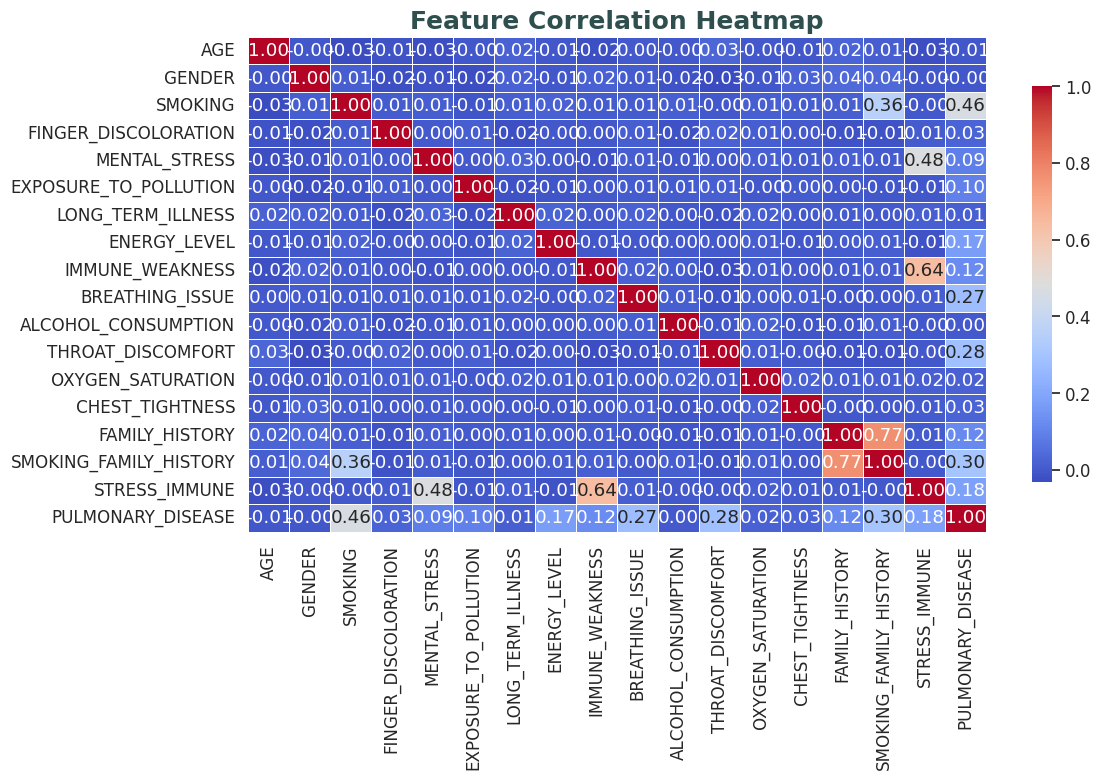

In [26]:

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.set(style="white", font_scale=1.1)


sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Feature Correlation Heatmap", fontsize=18, fontweight='bold', color='#2F4F4F')
plt.tight_layout()
plt.show()



In [27]:
# the power of relation between the features and the target
corr = df.corrwith(df['PULMONARY_DISEASE']).sort_values(ascending=False)
print("The relationship between the target and other features :")
corr

The relationship between the target and other features :


,0
PULMONARY_DISEASE,1.000000
SMOKING,0.461467
SMOKING_FAMILY_HISTORY,0.302478
THROAT_DISCOMFORT,0.283545
BREATHING_ISSUE,0.270464
STRESS_IMMUNE,0.181053
ENERGY_LEVEL,0.171479
IMMUNE_WEAKNESS,0.124736
FAMILY_HISTORY,0.117255
EXPOSURE_TO_POLLUTION,0.095222


In [28]:
# most related features
selected_features = [
    'SMOKING',
    'SMOKING_FAMILY_HISTORY',
    'THROAT_DISCOMFORT',
    'BREATHING_ISSUE',
    'STRESS_IMMUNE',
    'ENERGY_LEVEL',
    'IMMUNE_WEAKNESS',
    'FAMILY_HISTORY'
]

# set X&y
X = df[selected_features]
y = df['PULMONARY_DISEASE']

print("Features and target prepared :")
print("X shape:", X.shape)
print("y shape:", y.shape)

Features and target prepared :
X shape: (5000, 8)
y shape: (5000,)


In [30]:
#check if the data balance or not
print(df['PULMONARY_DISEASE'].value_counts())


PULMONARY_DISEASE
0    2963
1    2037
Name: count, dtype: int64


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
from sklearn.preprocessing import StandardScaler
import joblib   # Save the scaler for use during the deployment phase

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=selected_features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=selected_features)
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=4,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    results[name] = acc

    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.8790
ROC-AUC Score: 0.8793
Confusion Matrix:
 [[501  70]
 [ 51 378]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.89       571
           1       0.84      0.88      0.86       429

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000


Model: Random Forest
Accuracy: 0.8170
ROC-AUC Score: 0.8140
Confusion Matrix:
 [[477  94]
 [ 89 340]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       571
           1       0.78      0.79      0.79       429

    accuracy                           0.82      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.82      0.82      0.82      1000


Model: XGBoost
Accuracy: 0.8740
ROC-AUC Score: 0.8743
Confusion Matrix:
 [[498  73]
 

C:\Users\Vista Store\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:44:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





Model: Neural Network
Accuracy: 0.8810
ROC-AUC Score: 0.8796
Confusion Matrix:
 [[508  63]
 [ 56 373]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       571
           1       0.86      0.87      0.86       429

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [ ]:
'''from sklearn.metrics import accuracy_score, roc_auc_score, recall_score


print("Total Scores for Each Model:\n")
results = {}

for name, model in models.items():
  model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    macro_recall = recall_score(y_test, y_pred, average='macro')

    results[name] = {
        "Macro Recall": macro_recall
    }

    print(f"{name}:")
    print(f" Macro Recall:  {macro_recall:.4f}")


    '''





'from sklearn.metrics import accuracy_score, roc_auc_score, recall_score\n\n\nprint("Total Scores for Each Model:\n")\nresults = {}\n\nfor name, model in models.items():\n  model.fit(X_train, y_train)\n\n    y_pred = model.predict(X_test)\n    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None\n\n    macro_recall = recall_score(y_test, y_pred, average=\'macro\')\n\n    results[name] = {\n        "Macro Recall": macro_recall\n    }\n\n    print(f"{name}:")\n    print(f" Macro Recall:  {macro_recall:.4f}")\n\n\n    '

Our main goal is to **maximize** the model’s **accuracy** and **recall**, while **minimizing** false predictions, especially **false negatives** since this is a health-related problem where missing a positive case is **critical**.

## Hyperparameter Tuning

### Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import recall_score

In [ ]:
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   scoring='recall',
                                   random_state=42)
random_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FE0DF50E60>,
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   random_state=42, scoring='recall')

In [ ]:
# Report best score and parameters
print(f"Best recall: {random_search.best_score_:.4f}")
print(f"Best parameters: {random_search.best_params_}")

# Evaluate on test set
best_model = random_search.best_estimator_
joblib.dump(best_model, 'best_model.joblib')   # Save the model for use during the deployment phase
y_pred = best_model.predict(X_test_scaled)
rec_test = recall_score(y_test, y_pred)
print(f"Test set recall: {rec_test:.4f}")

Best recall: 0.8713
Best parameters: {'C': 0.022088468494409597, 'penalty': 'l1', 'solver': 'liblinear'}
Test set recall: 0.8998


As we can see, the test set recall increased to 89.98%.

### Random Forest

In [ ]:
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

In [ ]:
random_search = RandomizedSearchCV(
    RandomForestClassifier(n_estimators=100, random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='recall',
    n_jobs=-1)

random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE0DF3D2B0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE0DF66AB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE0F77DAF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FE0F813FB0>},
                   scoring='recall')

In [ ]:
# Report best score and parameters
print(f"Best recall: {random_search.best_score_:.4f}")
print(f"Best parameters: {random_search.best_params_}")

# Evaluate on test set
best_model = random_search.best_estimator_     #
y_pred = best_model.predict(X_test_scaled)
rec_test = recall_score(y_test, y_pred)
print(f"Test set recall: {rec_test:.4f}")

Best recall: 0.8638
Best parameters: {'bootstrap': False, 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 84}
Test set recall: 0.8998


As we can see, the test set recall is 89.98%

### XGBoost

In [ ]:
param_dist = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_child_weight': [1, 3, 5, 7],
    'learning_rate': uniform(0.01, 0.29)
}

In [ ]:
random_search = RandomizedSearchCV(estimator=XGBClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=4,
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss'),
        param_distributions=param_dist, scoring='recall', n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Vista Store\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning:

[16:45:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=200, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001FE0DF643E0>,
                                        'max_depth': [3, 5, 7, 9, 11],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='recall', verbose=2)

In [ ]:
# Report best score and parameters
print(f"Best recall: {random_search.best_score_:.4f}")
print(f"Best parameters: {random_search.best_params_}")

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rec_test = recall_score(y_test, y_pred)
print(f"Test set recall: {rec_test:.4f}")

Best recall: 0.8483
Best parameters: {'learning_rate': 0.05675417330366128, 'max_depth': 5, 'min_child_weight': 3}
Test set recall: 0.8881


As we can see, the test set recall increased to 88.81%.

### Neural Network (MLP Classifier)

In [ ]:
param_dist = {
    'learning_rate': ['constant','adaptive', 'invscaling'],
    'hidden_layer_sizes': [1,2,3,4,5],
    'batch_size': [32,64,128],
    'solver': ['adam', 'sgd']
}

In [ ]:
random_search = RandomizedSearchCV(estimator=MLPClassifier(max_iter=500, random_state=42),
                                   param_distributions=param_dist, scoring='recall', n_iter=50, cv=5, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=500, random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'batch_size': [32, 64, 128],
                                        'hidden_layer_sizes': [1, 2, 3, 4, 5],
                                        'learning_rate': ['constant',
                                                          'adaptive',
                                                          'invscaling'],
                                        'solver': ['adam', 'sgd']},
                   scoring='recall')

In [ ]:


# Report best score and parameters
print(f"Best recall: {random_search.best_score_:.4f}")
print(f"Best parameters: {random_search.best_params_}")

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
rec_test = recall_score(y_test, y_pred)
print(f"Test set recall: {rec_test:.4f}")

Best recall: 0.8707
Best parameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': 2, 'batch_size': 128}
Test set recall: 0.8834


Here, the test set recall didn't change much.